In [1]:
#pip install opencv-python
#pip install numpy
import cv2 
import numpy as np 
import time
from IPython.display import Image

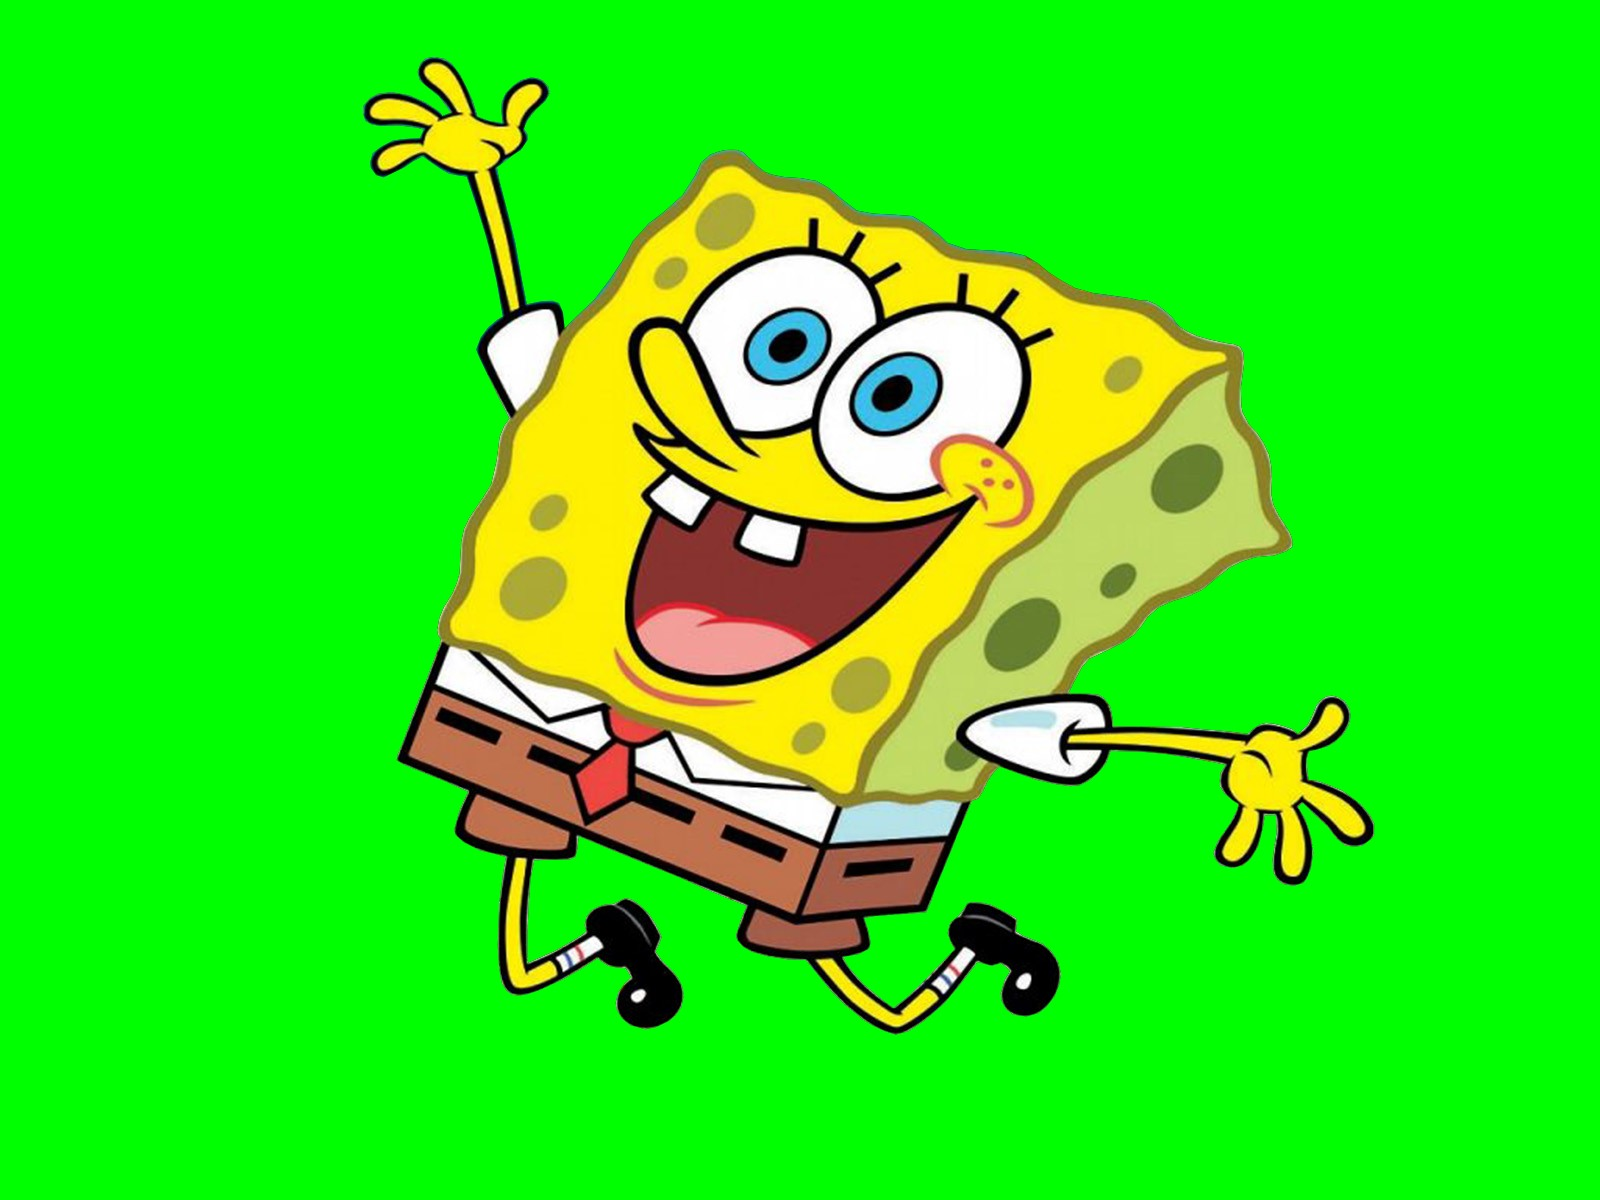

In [2]:
#load image
img=cv2.imread("potrait.jpg")
display(Image(filename="potrait.jpg"))

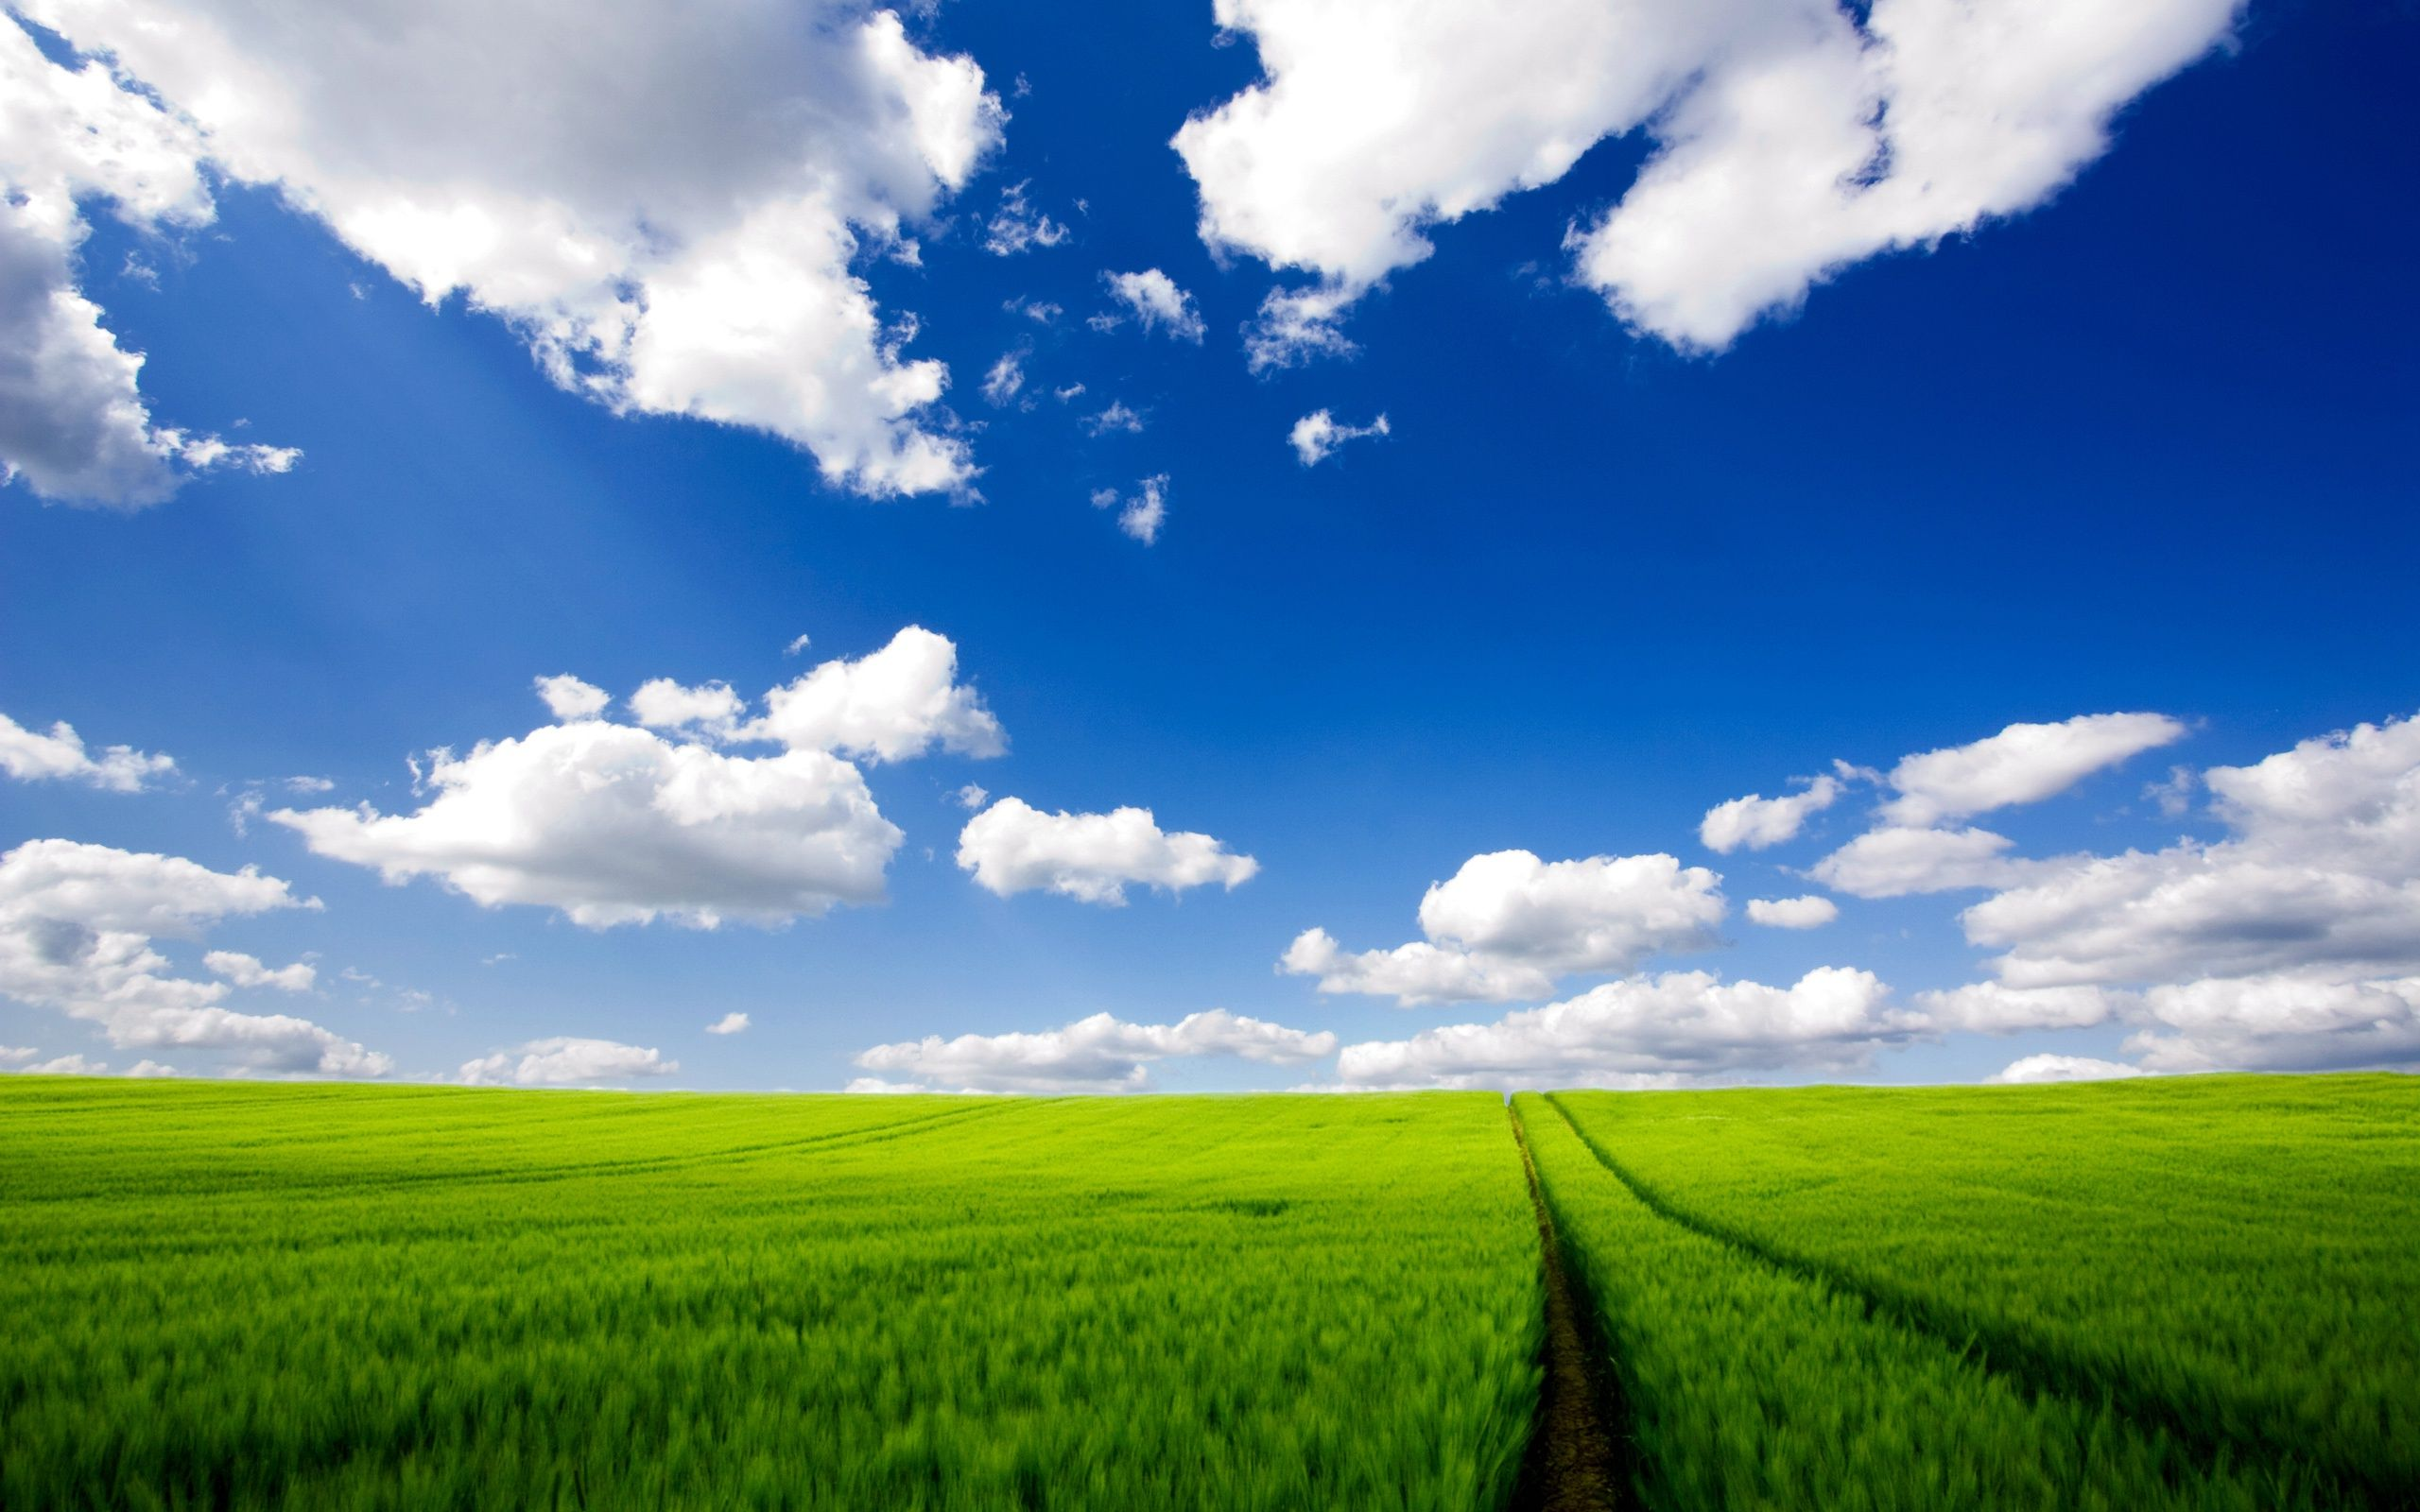

In [3]:
#load  background  and resize
bg=cv2.imread("background.jpg")
h,w,c=img.shape
bg=cv2.resize(bg,(w,h))
display(Image(filename="background.jpg"))

In [4]:
hsv = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)

In [5]:
#green mask
lower_green = np.array([45, 50, 50])
upper_green = np.array([79, 255, 255])
maskgreen = cv2.inRange(hsv,lower_green,upper_green)

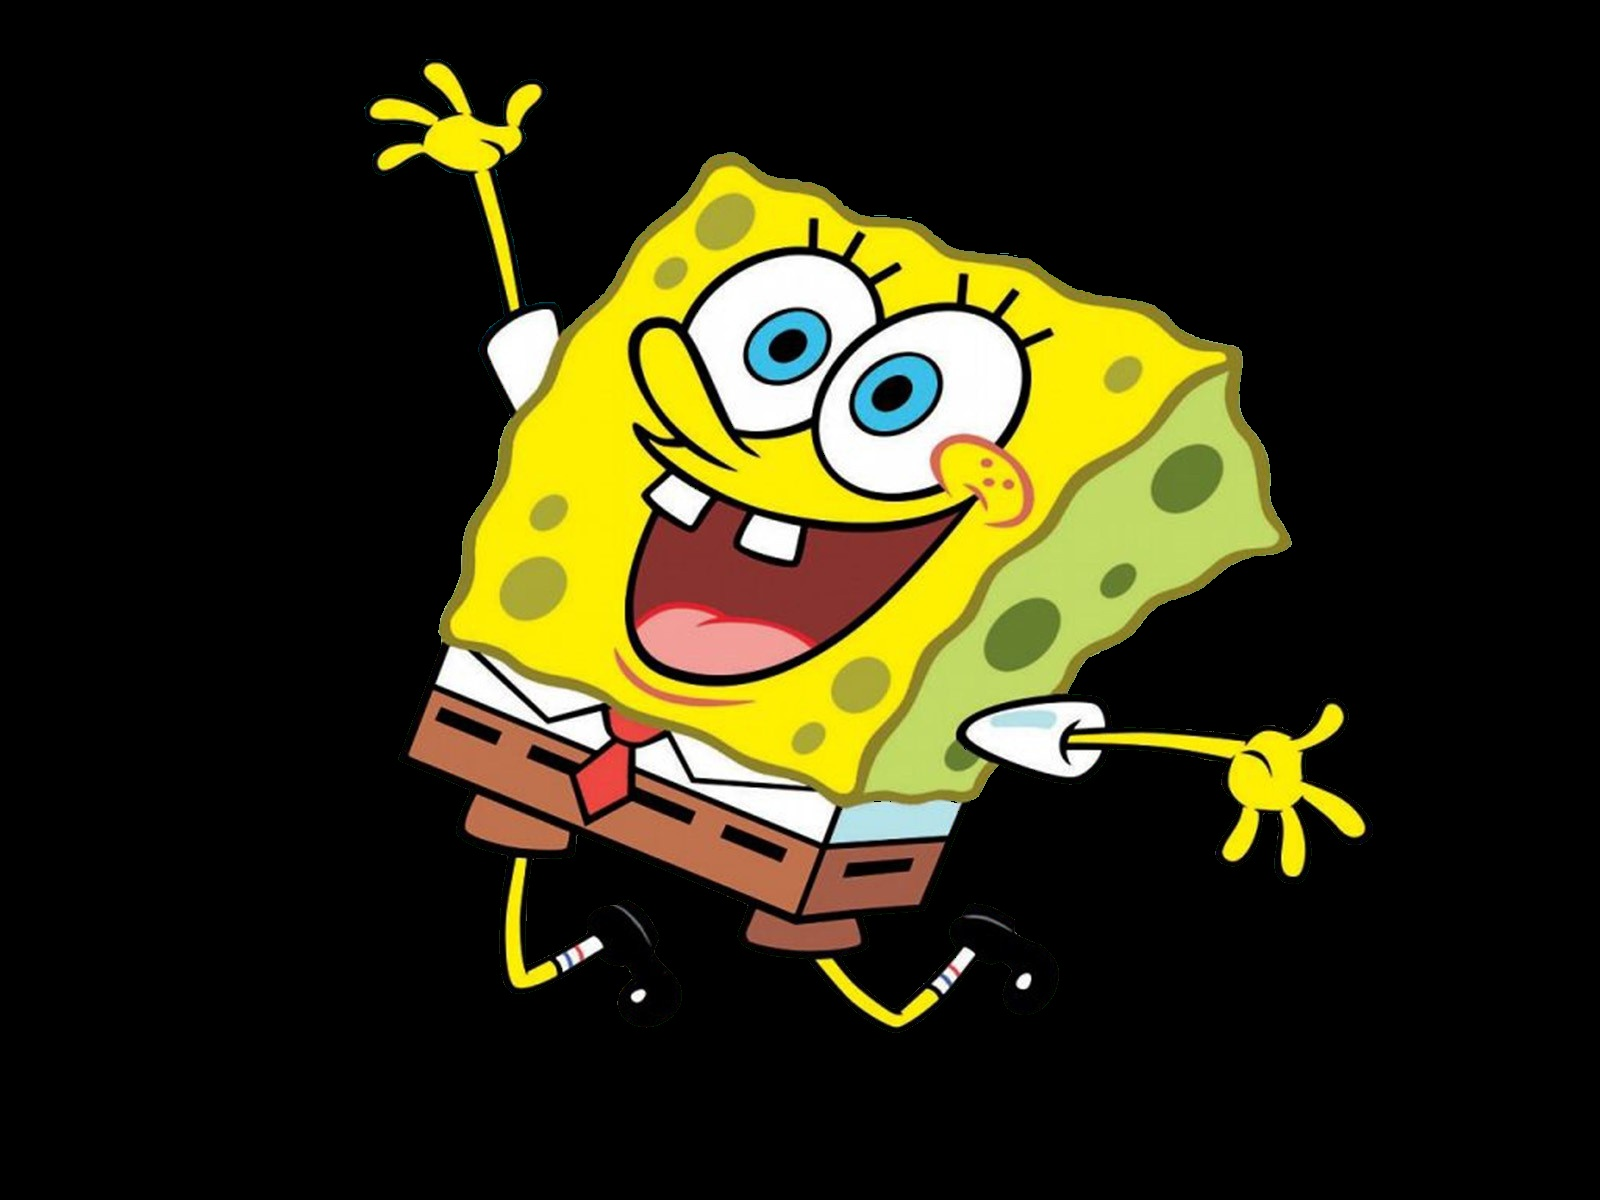

In [6]:
# set the potrait image to 0 ,except the mask
output_imggreen = img.copy()
output_imggreen[np.where(maskgreen==255)] = 0

cv2.imwrite("bgRemoved.jpg",output_imggreen)
display(Image(filename="bgRemoved.jpg"))

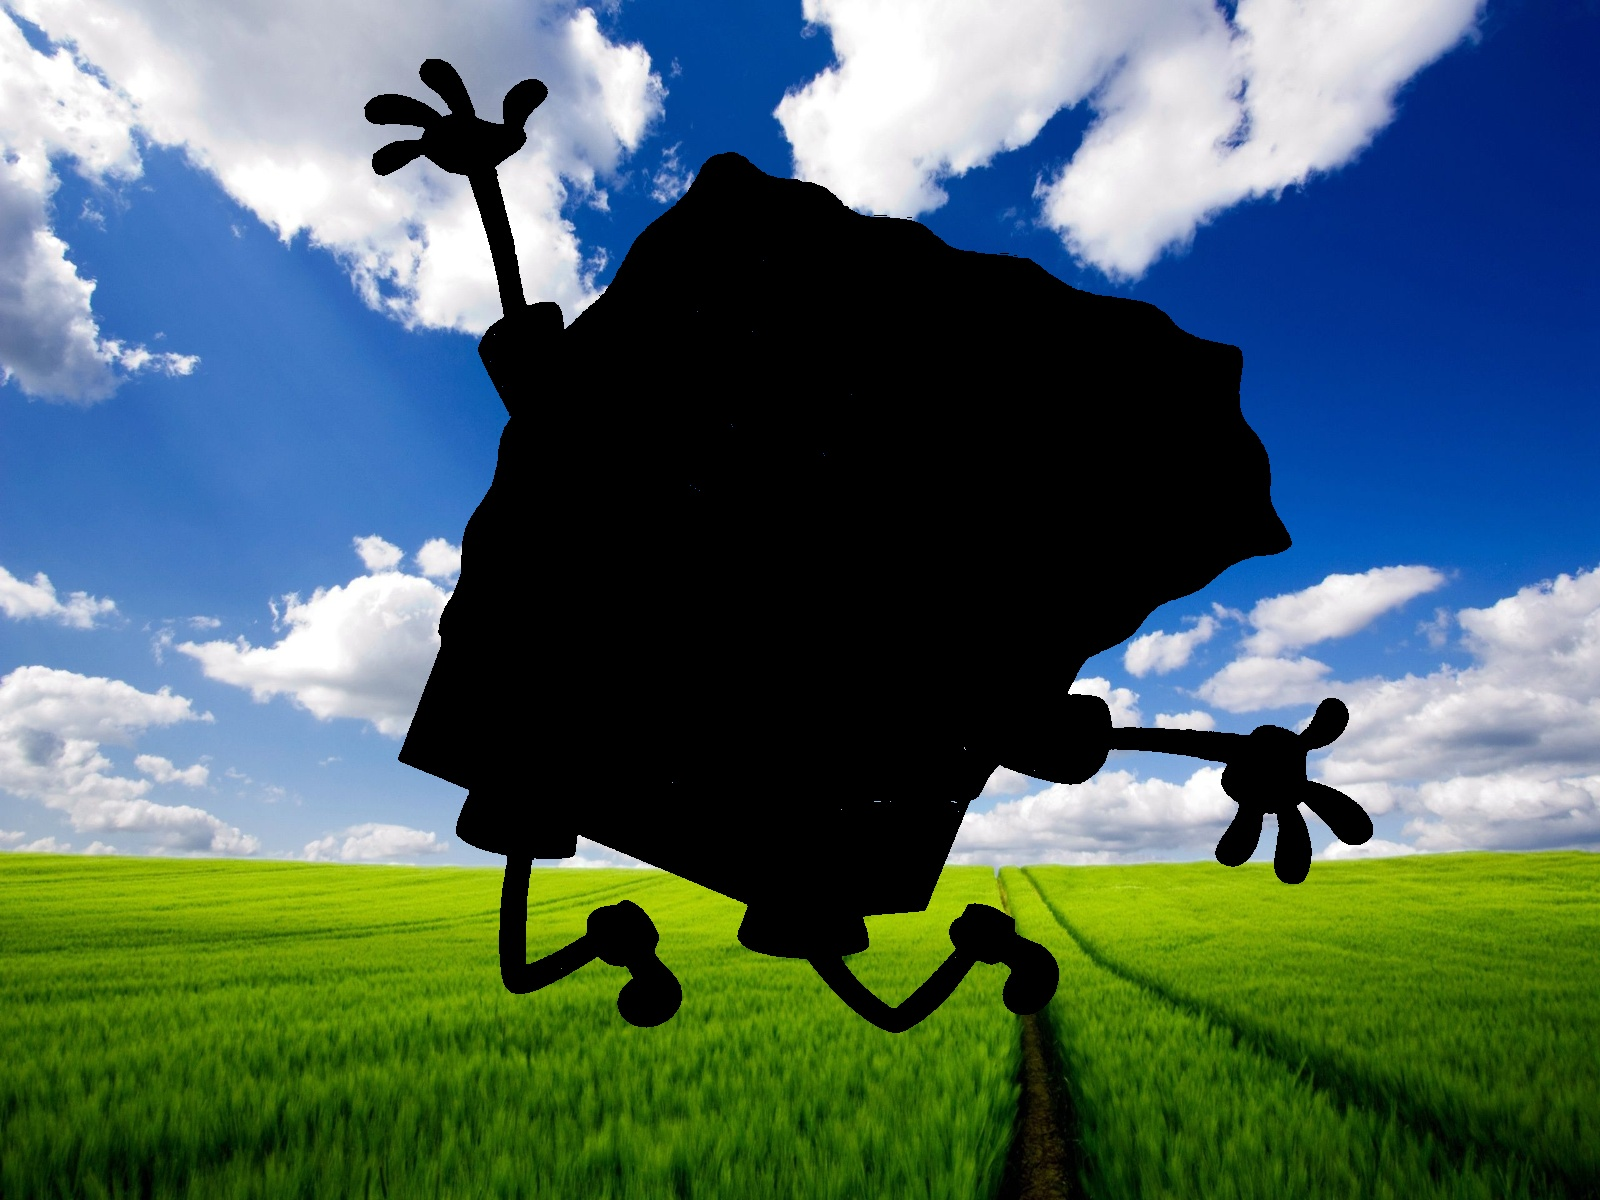

In [7]:
#mask background

bg[np.where(maskgreen==0)] = 0

cv2.imwrite("maskedbg.jpg",bg)
display(Image(filename="maskedbg.jpg"))

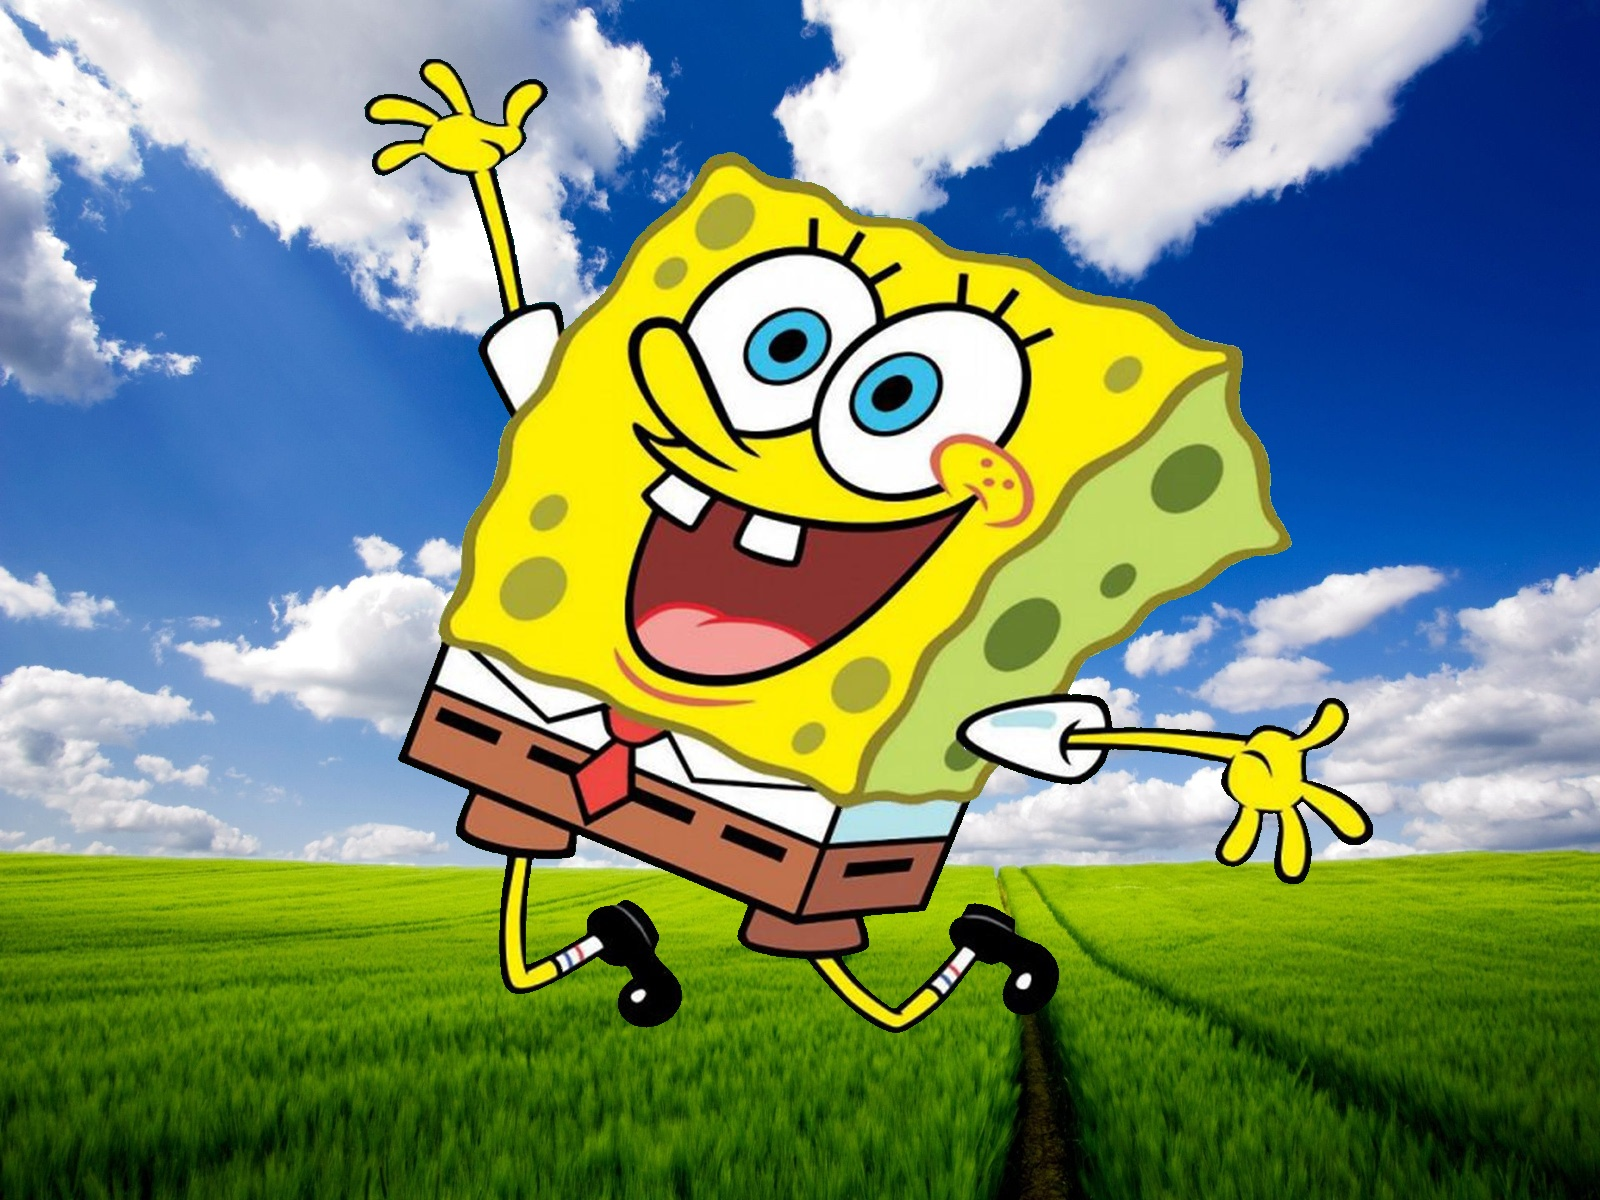

In [8]:
#merge images
final_output = cv2.addWeighted(bg,1,output_imggreen,1,0)
cv2.imwrite("merged.jpg",final_output)
display(Image(filename="merged.jpg"))